In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper', font_scale=1.3)
red, blue, green = sns.color_palette('Set1', 3)

import warnings
warnings.simplefilter('ignore', DeprecationWarning)

In [3]:
import curveball

In [29]:
df = pd.read_excel('../data/growth/Evo30vsEvo39_YPD39deg.xlsx', header=None, index_col=0).T
df = df.rename(columns={'time': 'Time'})
df['Time'] /= 60*60 # seconds -> hours
df.head()

,evo30,evo30,evo39,evo30,evo30,evo39,evo30,evo39,evo30,evo39,...,evo30,evo39,evo30,evo39,evo30,evo39,evo30,evo39,evo30,Time
1,0.0584,0.0580,0.0572,0.0566,0.0581,0.0558,0.0571,0.0578,0.0579,0.0561,...,0.0574,0.0566,0.0560,0.0559,0.0581,0.0570,0.0574,0.0575,0.0605,0.000000
2,0.0609,0.0607,0.0590,0.0595,0.0599,0.0605,0.0615,0.0600,0.0589,0.0598,...,0.0597,0.0590,0.0611,0.0608,0.0619,0.0585,0.0617,0.0614,0.0628,0.500556
3,0.0645,0.0648,0.0626,0.0646,0.0644,0.0646,0.0635,0.0625,0.0627,0.0631,...,0.0625,0.0604,0.0624,0.0620,0.0646,0.0616,0.0652,0.0629,0.0684,1.000556
4,0.0661,0.0659,0.0631,0.0642,0.0647,0.0637,0.0659,0.0628,0.0651,0.0625,...,0.0627,0.0625,0.0628,0.0617,0.0645,0.0614,0.0643,0.0618,0.0659,1.500556
5,0.0675,0.0666,0.0674,0.0665,0.0667,0.0665,0.0650,0.0661,0.0653,0.0664,...,0.0658,0.0637,0.0655,0.0644,0.0661,0.0657,0.0654,0.0648,0.0673,2.000833


In [30]:
df = pd.melt(df, id_vars='Time', var_name='Strain', value_name='OD')
df.head()

,Time,Strain,OD
0,0.000000,evo30,0.0584
1,0.500556,evo30,0.0609
2,1.000556,evo30,0.0645
3,1.500556,evo30,0.0661
4,2.000833,evo30,0.0675


[(0, 13)]

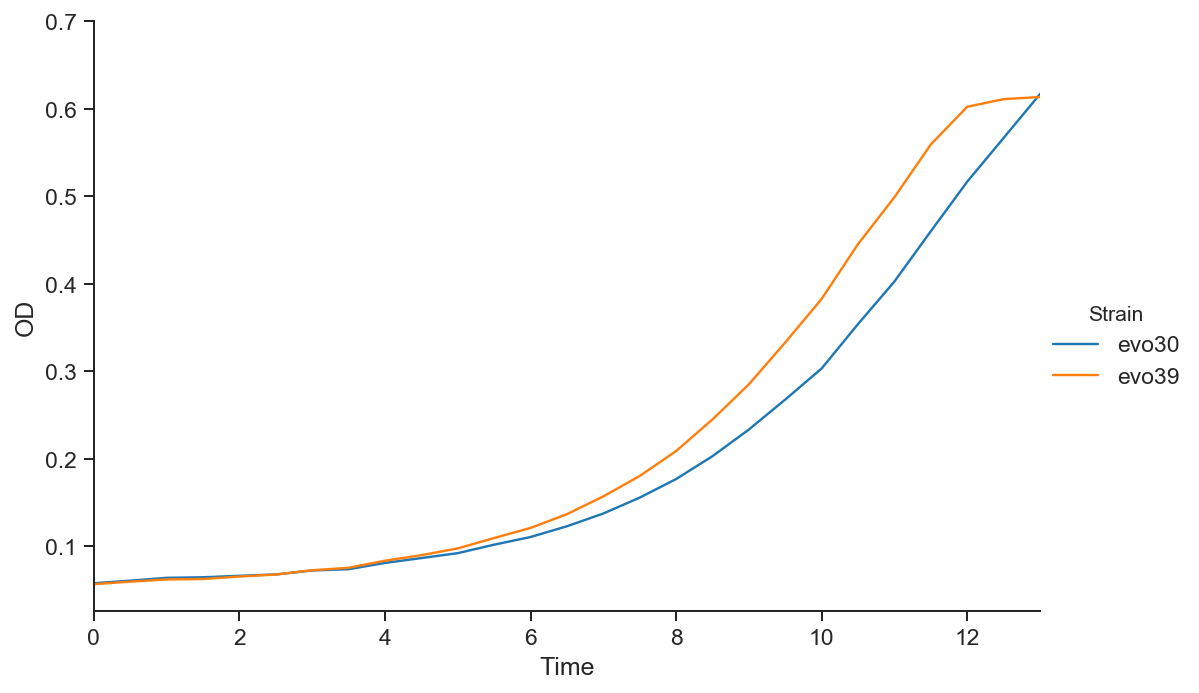

In [38]:
g = curveball.plots.plot_strains(df)
g.axes[0,0].set(xlim=(0, 13))

In [39]:
df_evo30 = df[df['Strain']=='evo30']
df_evo39 = df[df['Strain']=='evo39']

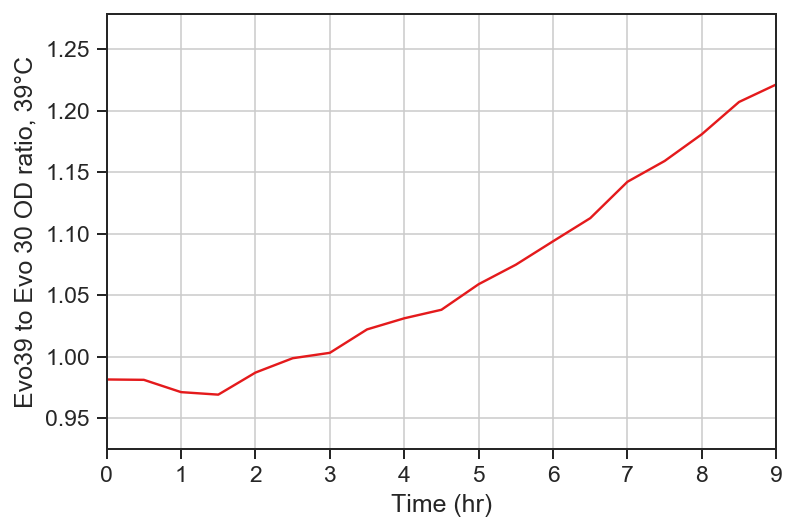

In [112]:
fig, ax = plt.subplots()
od_ratio = df_evo39.groupby('Time').mean() / df_evo30.groupby('Time').mean()
ax.plot(od_ratio.index, od_ratio['OD'], color=red)
ax.set(xlim=(0, 9), xlabel='Time (hr)', ylabel='Evo39 to Evo 30 OD ratio, 39°C')
ax.grid(True);

[[Model]]
    Model(BaranyiRoberts)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 262
    # data points      = 1428
    # variables        = 6
    chi-square         = 0.29321639
    reduced chi-square = 2.0620e-04
    Akaike info crit   = -12112.9689
    Bayesian info crit = -12081.3847
[[Variables]]
    y0:  0.06032510 +/- 0.00115648 (1.92%) (init = 0.05767857)
    K:   0.66576310 +/- 0.00112788 (0.17%) (init = 0.66995)
    r:   0.29837862 +/- 0.00845227 (2.83%) (init = 0.610454)
    nu:  5.53210254 +/- 0.33952619 (6.14%) (init = 1)
    q0:  0.09549385 +/- 0.01903502 (19.93%) (init = 0.02107648)
    v:   0.52386475 +/- 0.05342889 (10.20%) (init = 0.6164193)


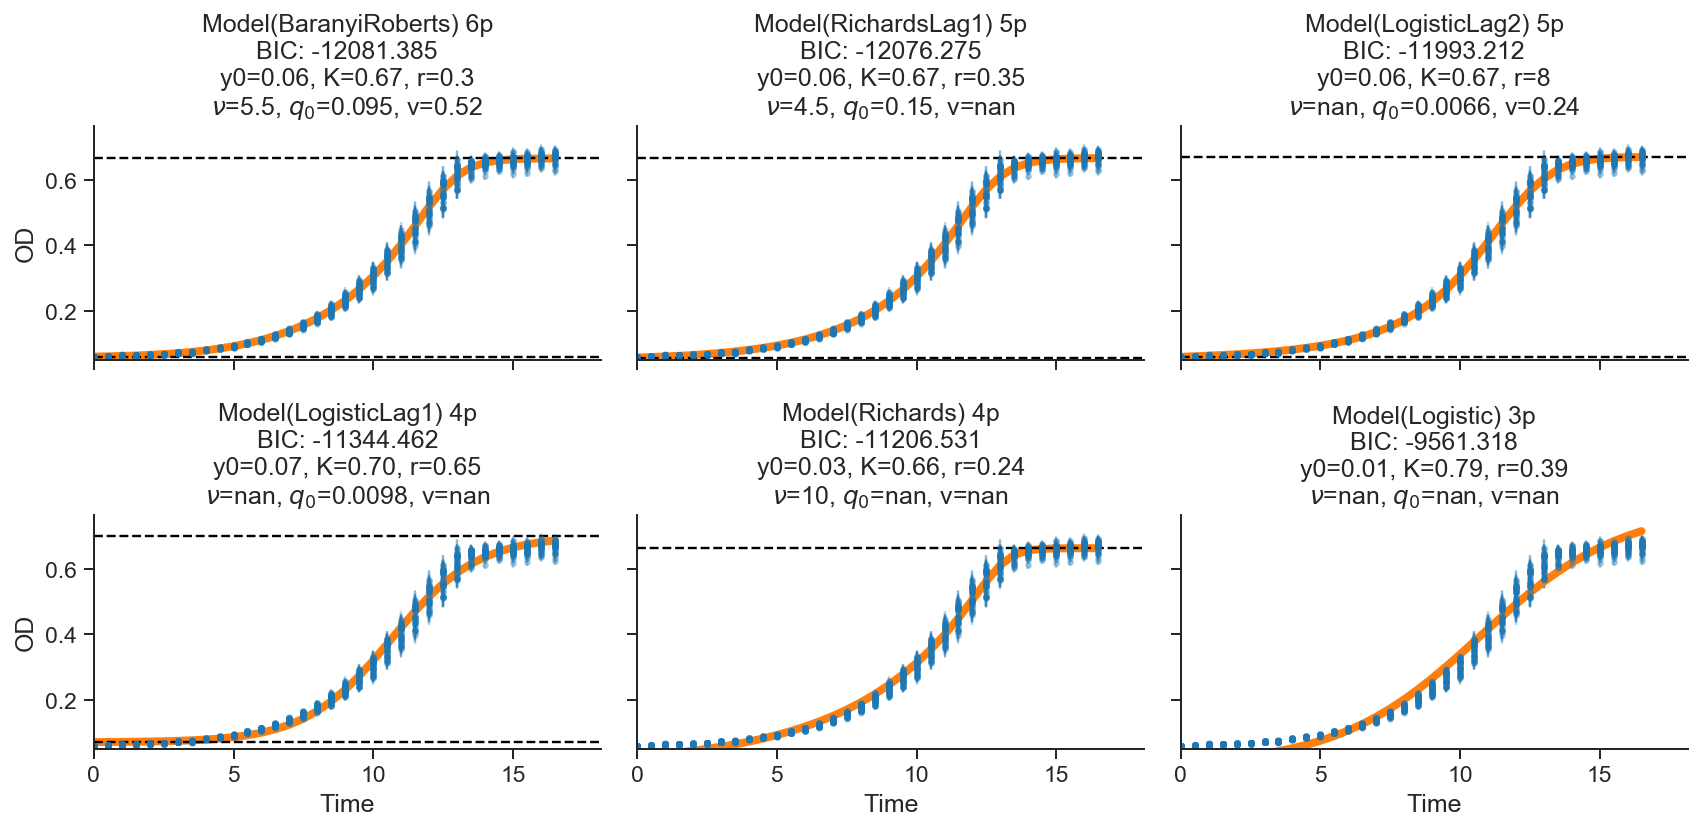

In [113]:
m_evo30, fig, axes = curveball.models.fit_model(df_evo30)

[[Model]]
    Model(BaranyiRoberts)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 183
    # data points      = 1190
    # variables        = 6
    chi-square         = 0.13707805
    reduced chi-square = 1.1578e-04
    Akaike info crit   = -10780.0070
    Bayesian info crit = -10749.5167
[[Variables]]
    y0:  0.05895560 +/- 9.8275e-04 (1.67%) (init = 0.05661143)
    K:   0.62245887 +/- 6.7596e-04 (0.11%) (init = 0.6309486)
    r:   0.32022851 +/- 0.00697388 (2.18%) (init = 0.4475337)
    nu:  6.74175557 +/- 0.36746977 (5.45%) (init = 1)
    q0:  0.09259829 +/- 0.01672018 (18.06%) (init = 0.00573873)
    v:   0.58966066 +/- 0.05152946 (8.74%) (init = 1.420609)


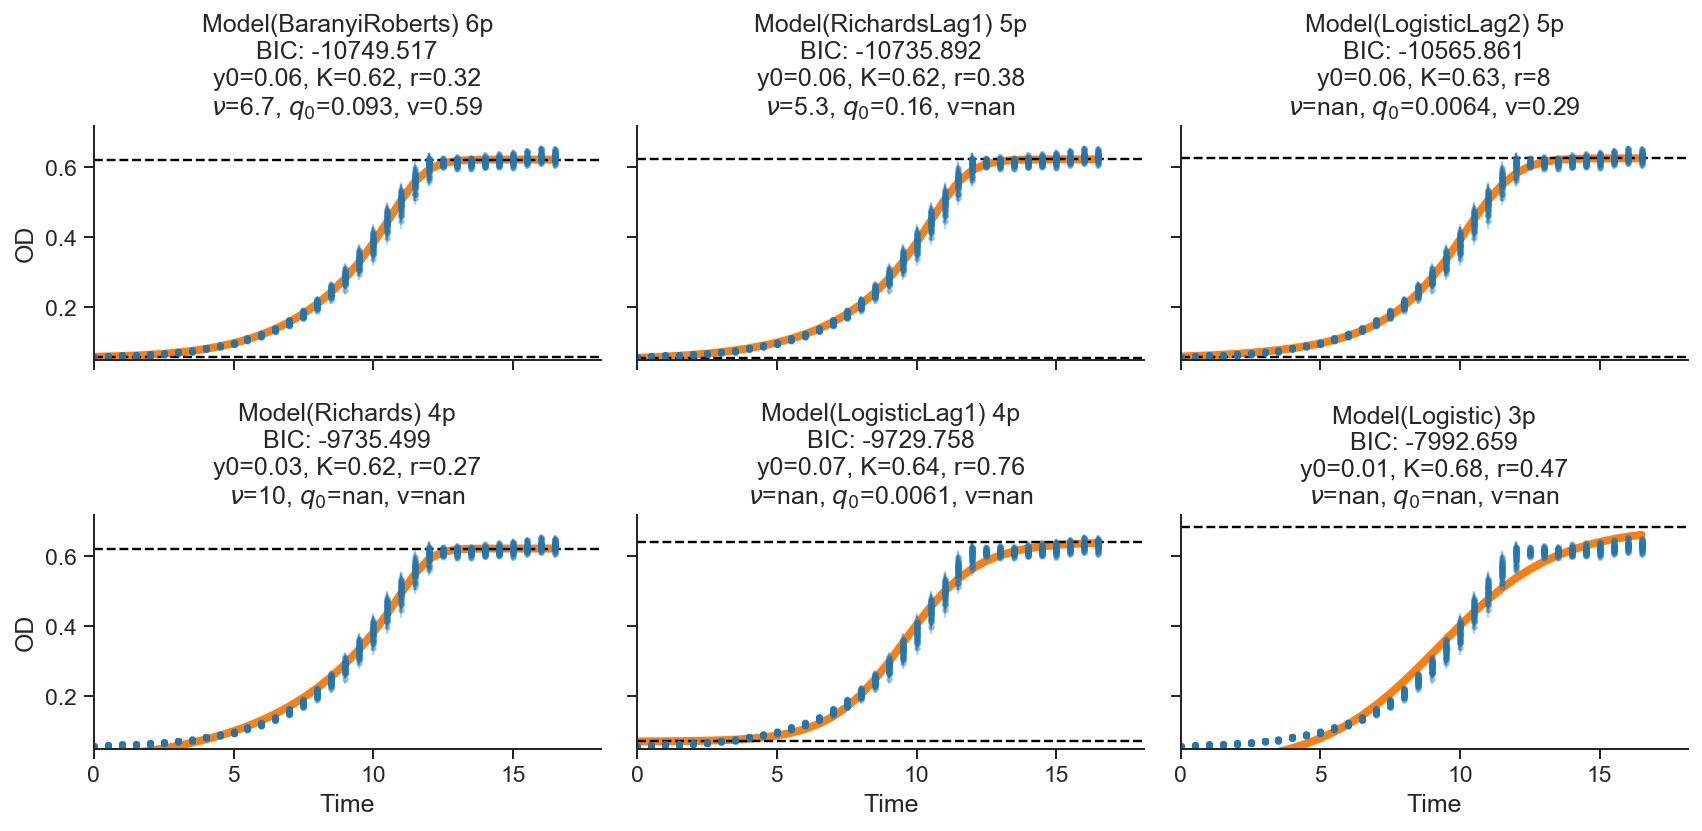

In [114]:
m_evo39, fig, axes = curveball.models.fit_model(df_evo39)

In [115]:
y0 = (m_evo30[0].params['y0'].value, m_evo39[0].params['y0'].value)
print(y0)
y0 = np.mean(y0)/2, np.mean(y0)/2
print(y0)

(0.060325102152847476, 0.05895560494616592)
(0.02982017677475335, 0.02982017677475335)


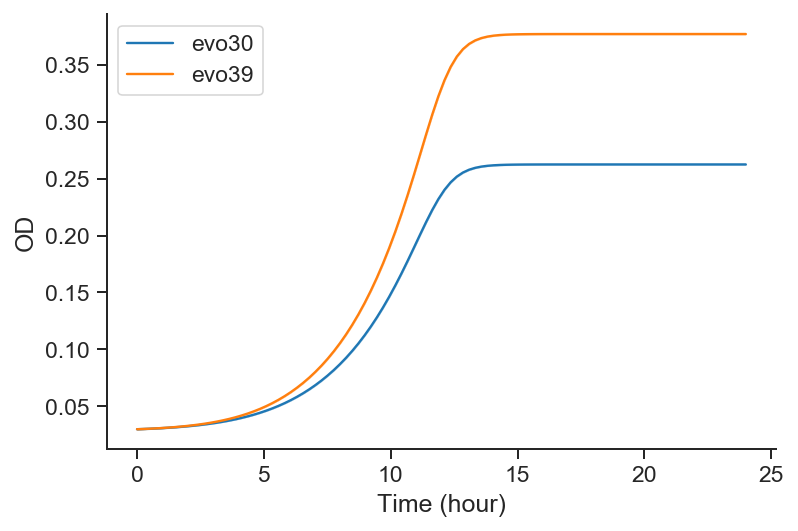

In [173]:
t, y, fig, ax = curveball.competitions.compete(m_evo30[0], m_evo39[0], y0=y0, PLOT=True, nsamples=10000)
# y = y.squeeze()
ax.legend(['evo30', 'evo39']);

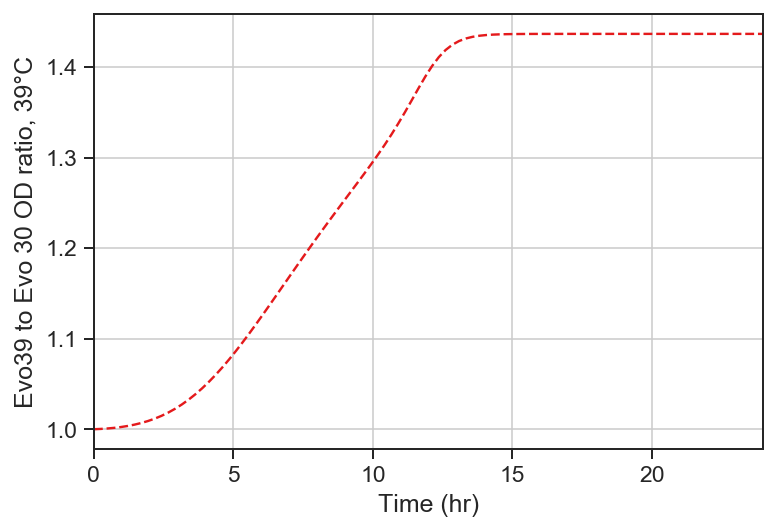

In [174]:
fig, ax = plt.subplots()

od_ratio_hat = y[:, 1].mean(axis=1)/y[:, 0].mean(axis=1)
ax.plot(t, od_ratio_hat, color=red, ls='--')
# ax.plot(od_ratio.index, od_ratio['OD'], color=red)
ax.set(xlim=(0, 24), xlabel='Time (hr)', ylabel='Evo39 to Evo 30 OD ratio, 39°C')
ax.grid(True)

w = 1.1669 (95% CI 1.0597 - 1.1168)


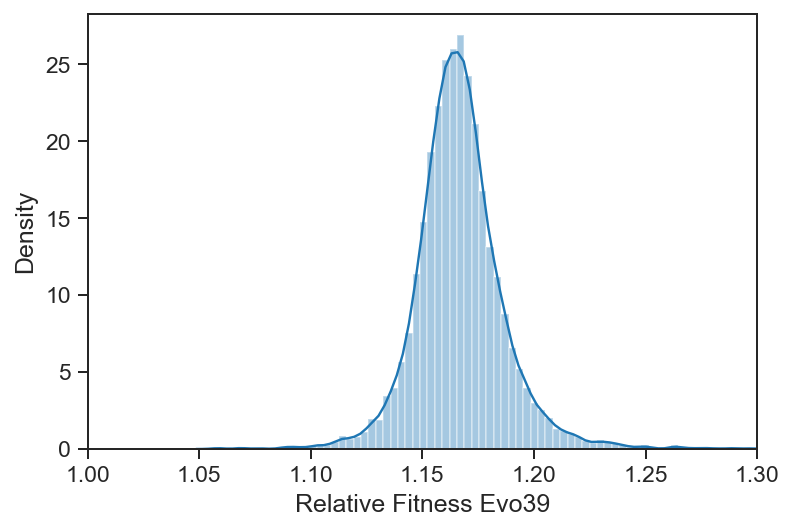

In [180]:
w = np.array([curveball.competitions.fitness_LTEE(y[:,:,i]) for i in range(y.shape[2])])
print("w = {:.4f} (95% CI {:.4f} - {:.4f})".format(
    w.mean(), np.percentile(w, 0.025), np.percentile(w, 0.975)
))
ax = sns.distplot(w, bins=100, kde=True)
ax.set(xlabel='Relative Fitness Evo39', xlim=(1, 1.3), ylabel='Density');

In [176]:
np.savez_compressed('evo39_fitness.npz', w)